Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           32000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 85,503
Trainable params: 85,503
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


2023-04-09 18:04:29.049999: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


129/129 [==============================] - 73s 559ms/step - loss: 0.4951 - accuracy: 0.8755 - val_loss: 0.4486 - val_accuracy: 0.8811
Epoch 2/10
129/129 [==============================] - 73s 569ms/step - loss: 0.4513 - accuracy: 0.8788 - val_loss: 0.4527 - val_accuracy: 0.8811
Epoch 3/10
129/129 [==============================] - 73s 564ms/step - loss: 0.4514 - accuracy: 0.8788 - val_loss: 0.4465 - val_accuracy: 0.8811
Epoch 4/10
129/129 [==============================] - 73s 566ms/step - loss: 0.4499 - accuracy: 0.8788 - val_loss: 0.4488 - val_accuracy: 0.8811
Epoch 5/10
129/129 [==============================] - 74s 572ms/step - loss: 0.4500 - accuracy: 0.8788 - val_loss: 0.4456 - val_accuracy: 0.8811
Epoch 6/10
129/129 [==============================] - 74s 576ms/step - loss: 0.4500 - accuracy: 0.8788 - val_loss: 0.4455 - val_accuracy: 0.8811
Epoch 7/10
129/129 [==============================] - 73s 569ms/step - loss: 0.4482 - accuracy: 0.8790 - val_loss: 0.4483 - val_accuracy: 0.8

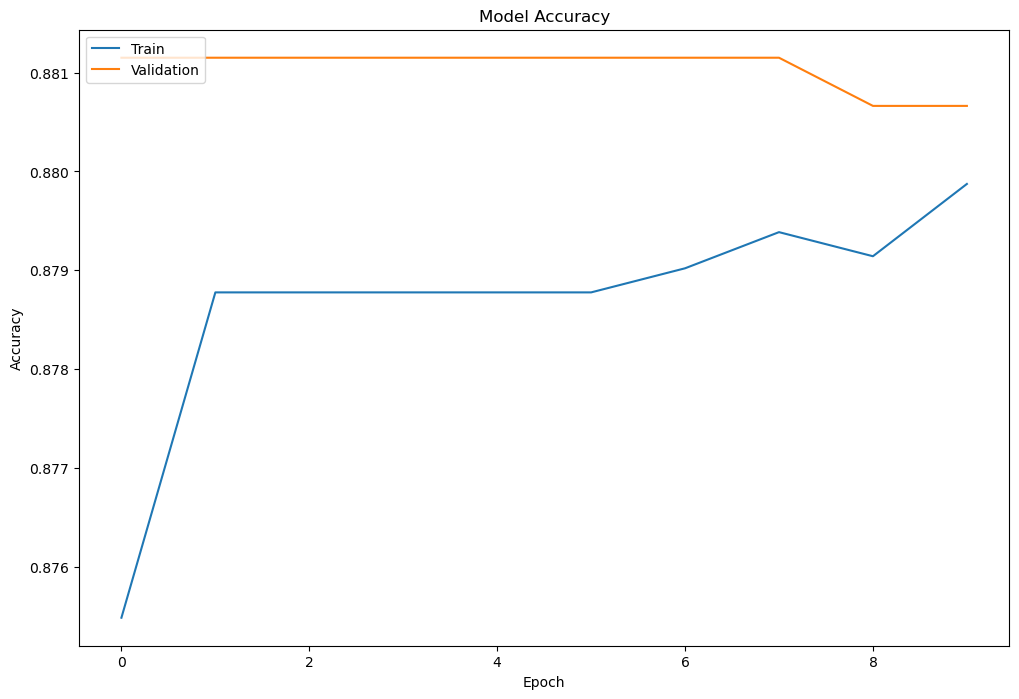

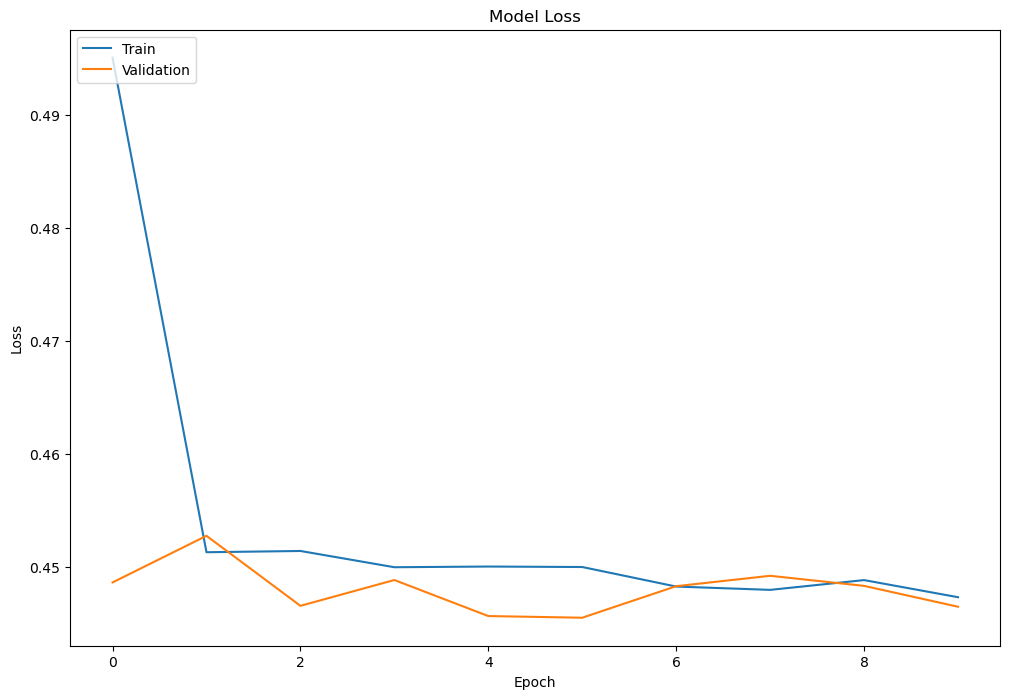

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

# load the dataset
df = pd.read_csv("data_amazon_review/Sentiment_labeled_reviews.csv")

# split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# tokenize the reviews
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(train_df["review"])

# convert text to sequences
X_train = tokenizer.texts_to_sequences(train_df["review"])
X_test = tokenizer.texts_to_sequences(test_df["review"])

# add padding to ensure uniform length
maxlen = 500
X_train = pad_sequences(X_train, padding="post", maxlen=maxlen)
X_test = pad_sequences(X_test, padding="post", maxlen=maxlen)

# convert sentiment categories to numeric labels
y_train = pd.get_dummies(train_df["sentiment"]).values
y_test = pd.get_dummies(test_df["sentiment"]).values

# define the model architecture
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(1000, embedding_vector_length, input_length=maxlen))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

# train the model
epochs = 10
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=epochs, batch_size=64, verbose=1)

# evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

# plot the accuracy and loss for training and validation sets
plt.figure(figsize=(12, 8))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()
